In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score

In [84]:
cleaned_dataset = pd.read_csv('Cleaned_dataset.csv',index_col='Prospect_ID')
cleaned_dataset.head()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Median_Asymm_Activity_Score,Median_Asymm_Profile_Score,Lead_Origin,Lead_Source,Do_Not_Email,...,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,numeric_lead_quality,ad_medium
Prospect_ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,15.0,15.0,0.387446,0.189935,0,...,0.055519,0,0,0.741883,0.243398,0,0,0.368723,2,0.0
2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,15.0,15.0,0.387446,0.124892,0,...,0.130195,0,0,0.741883,0.243398,0,0,0.305952,0,0.0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,14.0,20.0,0.528788,0.275216,0,...,0.587121,0,0,0.174567,0.502381,0,1,0.305952,0,0.0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,13.0,17.0,0.528788,0.275216,0,...,0.130195,0,0,0.741883,0.502381,0,0,0.368723,0,0.0
3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,15.0,18.0,0.528788,0.314827,0,...,0.587121,0,0,0.741883,0.502381,0,0,0.368723,0,0.0


## seperating target variable and features

In [85]:
y = cleaned_dataset.Converted
features_x = cleaned_dataset.loc[:,cleaned_dataset.columns!= 'Converted']
y.shape, features_x.shape

((9240,), (9240, 27))

In [86]:
y.value_counts()/(y.count())

Converted
0    0.61461
1    0.38539
Name: count, dtype: float64

###  as there is no class-imbalance we can use normal splitting strategy

In [87]:
## 25% of dataset used as test set
features_train, features_test, y_train, y_test = train_test_split(features_x,y,random_state=3)

In [88]:
features_train.shape, features_test.shape

((6930, 27), (2310, 27))

### scaling features

In [89]:
features_train.describe()

,Lead_Number,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Median_Asymm_Activity_Score,Median_Asymm_Profile_Score,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,...,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,numeric_lead_quality,ad_medium
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,...,6930.000000,6930.0,6930.0,6930.000000,6930.000000,6930.0,6930.000000,6930.000000,6930.000000,6930.000000
mean,617189.848485,3.481828,487.080808,2.365703,14.170563,16.179365,0.437187,0.230154,0.080519,0.000289,...,0.370692,0.0,0.0,0.584940,0.326612,0.0,0.311400,0.286798,0.400722,0.000004
std,23382.280497,5.139840,546.295467,2.149846,1.037916,1.351493,0.126232,0.089056,0.272115,0.016987,...,0.259561,0.0,0.0,0.268665,0.186688,0.0,0.463099,0.097938,0.884121,0.000076
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.005952,0.000108,0.000000,0.000000,...,0.000216,0.0,0.0,0.002165,0.008009,0.0,0.000000,0.000108,0.000000,0.000000
25%,596351.000000,1.000000,14.000000,1.000000,14.000000,16.000000,0.387446,0.189935,0.000000,0.000000,...,0.055519,0.0,0.0,0.174567,0.081385,0.0,0.000000,0.235065,0.000000,0.000000
50%,615440.500000,3.000000,247.000000,2.000000,14.000000,16.000000,0.528788,0.275216,0.000000,0.000000,...,0.587121,0.0,0.0,0.741883,0.243398,0.0,0.000000,0.305952,0.000000,0.000000
75%,637289.750000,5.000000,932.000000,3.000000,14.000000,16.000000,0.528788,0.314827,0.000000,0.000000,...,0.587121,0.0,0.0,0.741883,0.502381,0.0,1.000000,0.368723,0.000000,0.000000
max,660727.000000,251.000000,2253.000000,55.000000,18.000000,20.000000,0.528788,0.314827,1.000000,1.000000,...,0.587121,0.0,0.0,0.741883,0.502381,0.0,1.000000,0.368723,3.000000,0.003030


(array([6.456e+03, 4.370e+02, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

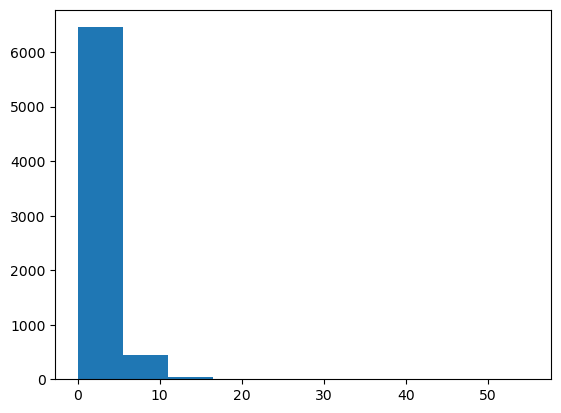

In [90]:
plt.hist(features_train['Page_Views_Per_Visit'])

array([[<Axes: title={'center': 'Lead_Number'}>,
        <Axes: title={'center': 'TotalVisits'}>,
        <Axes: title={'center': 'Total_Time_Spent_on_Website'}>,
        <Axes: title={'center': 'Page_Views_Per_Visit'}>,
        <Axes: title={'center': 'Median_Asymm_Activity_Score'}>],
       [<Axes: title={'center': 'Median_Asymm_Profile_Score'}>,
        <Axes: title={'center': 'Lead_Origin'}>,
        <Axes: title={'center': 'Lead_Source'}>,
        <Axes: title={'center': 'Do_Not_Email'}>,
        <Axes: title={'center': 'Do_Not_Call'}>],
       [<Axes: title={'center': 'Last_Activity'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Specialization'}>,
        <Axes: title={'center': 'How_did_you_hear_about_X_Education'}>,
        <Axes: title={'center': 'What_is_your_current_occupation'}>],
       [<Axes: title={'center': 'What_matters_most_to_you_in_choosing_a_course'}>,
        <Axes: title={'center': 'Receive_More_Updates_About_Our_Courses'}>,
  

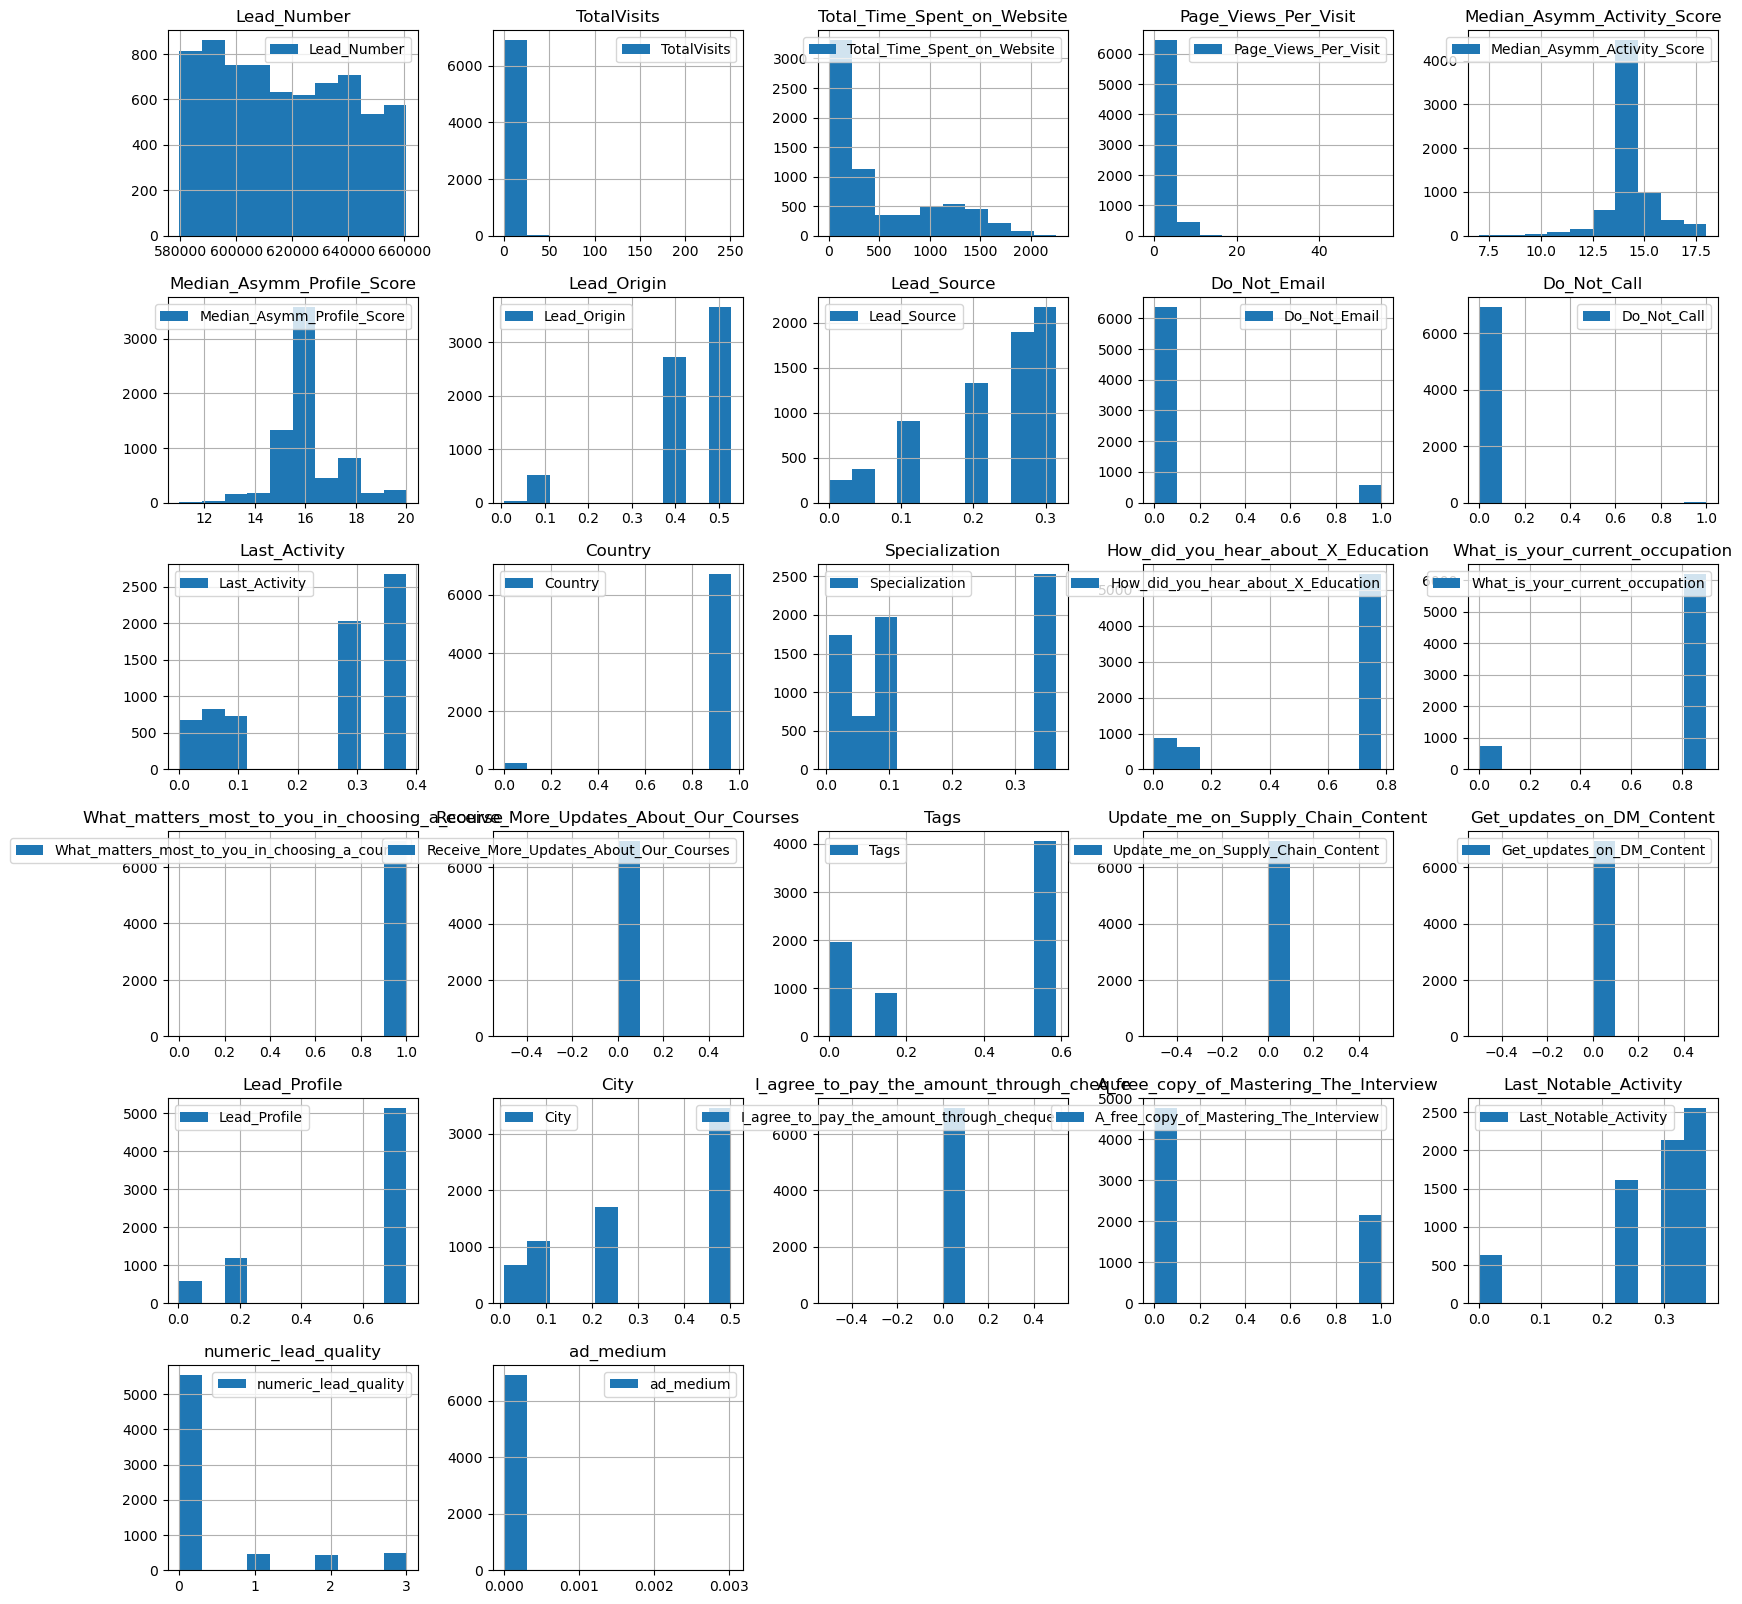

In [91]:
features_train.hist(figsize=(20,20),legend=True)

### the non-gaussian distribution of data tells us that Standard scalar should not be used. Power transformation could be applied

In [95]:
power_tr = PowerTransformer()  
x_train_scaled = power_tr.fit_transform(features_train)


C:\Users\tanm.pha\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\tanm.pha\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[-0.22390787,  0.21124204, -0.5066414 , ..., -1.9087516 ,
        -0.49806972, -0.05379922],
       [-0.09534294,  0.94445669,  0.29484264, ..., -0.06733125,
        -0.49806972, -0.05379922],
       [-0.86421569, -1.47341987, -1.47771501, ..., -0.92611402,
        -0.49806972, -0.05379922],
       ...,
       [-1.67081107, -1.47341987, -1.47771501, ..., -1.96104287,
        -0.49806972, -0.05379922],
       [ 1.09654749, -0.15344535, -0.98034216, ...,  1.11671967,
        -0.49806972, -0.05379922],
       [-0.53893932, -0.15344535,  1.06632351, ..., -0.92611402,
        -0.49806972, -0.05379922]])

In [98]:
power_tr.feature_names_in_

array(['Lead_Number', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Median_Asymm_Activity_Score',
       'Median_Asymm_Profile_Score', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course',
       'Receive_More_Updates_About_Our_Courses', 'Tags',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity',
       'numeric_lead_quality', 'ad_medium'], dtype=object)

In [99]:
power_tr.lambdas_

array([-1.67561773e+00,  7.77658832e-02,  2.24196340e-01,  2.24868625e-01,
        1.32712487e+00, -5.21855132e-01,  8.84565401e+00,  8.25865954e+00,
       -1.79164422e+01, -4.99893824e+03,  5.56830976e+00,  4.92062377e+01,
       -3.76081127e+00,  8.27879040e+00,  1.63562057e+01,  5.20353056e+02,
        1.00000000e+00,  2.78907117e+00,  1.00000000e+00,  1.00000000e+00,
        7.90609455e+00,  2.63161586e+00,  1.00000000e+00, -3.58773939e+00,
        9.68663805e+00, -4.42516769e+00, -2.78629788e+05])

In [100]:
x_train_scaled_df = pd.DataFrame(data=x_train_scaled,columns=power_tr.feature_names_in_)
x_train_scaled_df.head()

,Lead_Number,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Median_Asymm_Activity_Score,Median_Asymm_Profile_Score,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,...,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,numeric_lead_quality,ad_medium
0,-0.223908,0.211242,-0.506641,-0.224047,-0.175604,-0.076044,-0.820874,-0.723264,-0.295923,-0.016991,...,0.837007,0.0,0.0,0.588280,0.962096,0.0,-0.672474,-1.908752,-0.498070,-0.053799
1,-0.095343,0.944457,0.294843,0.521120,-0.175604,-0.076044,0.904278,1.119014,-0.295923,-0.016991,...,0.837007,0.0,0.0,-1.739631,0.962096,0.0,-0.672474,-0.067331,-0.498070,-0.053799
2,-0.864216,-1.473420,-1.477715,-1.468731,-0.175604,-0.076044,-0.820874,-0.723264,-0.295923,-0.016991,...,0.837007,0.0,0.0,0.588280,-0.553886,0.0,-0.672474,-0.926114,-0.498070,-0.053799
3,-1.321136,-0.153445,-0.087331,0.055704,-0.175604,0.652826,0.904278,0.386489,-0.295923,-0.016991,...,-1.327480,0.0,0.0,0.588280,0.962096,0.0,1.487046,-0.926114,-0.498070,-0.053799
4,-0.687432,1.284258,1.278694,0.378651,-0.175604,-0.076044,0.904278,1.119014,-0.295923,-0.016991,...,-1.213164,0.0,0.0,0.588280,0.962096,0.0,-0.672474,1.116720,1.935537,-0.053799


array([[<Axes: title={'center': 'Lead_Number'}>,
        <Axes: title={'center': 'TotalVisits'}>,
        <Axes: title={'center': 'Total_Time_Spent_on_Website'}>,
        <Axes: title={'center': 'Page_Views_Per_Visit'}>,
        <Axes: title={'center': 'Median_Asymm_Activity_Score'}>],
       [<Axes: title={'center': 'Median_Asymm_Profile_Score'}>,
        <Axes: title={'center': 'Lead_Origin'}>,
        <Axes: title={'center': 'Lead_Source'}>,
        <Axes: title={'center': 'Do_Not_Email'}>,
        <Axes: title={'center': 'Do_Not_Call'}>],
       [<Axes: title={'center': 'Last_Activity'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Specialization'}>,
        <Axes: title={'center': 'How_did_you_hear_about_X_Education'}>,
        <Axes: title={'center': 'What_is_your_current_occupation'}>],
       [<Axes: title={'center': 'What_matters_most_to_you_in_choosing_a_course'}>,
        <Axes: title={'center': 'Receive_More_Updates_About_Our_Courses'}>,
  

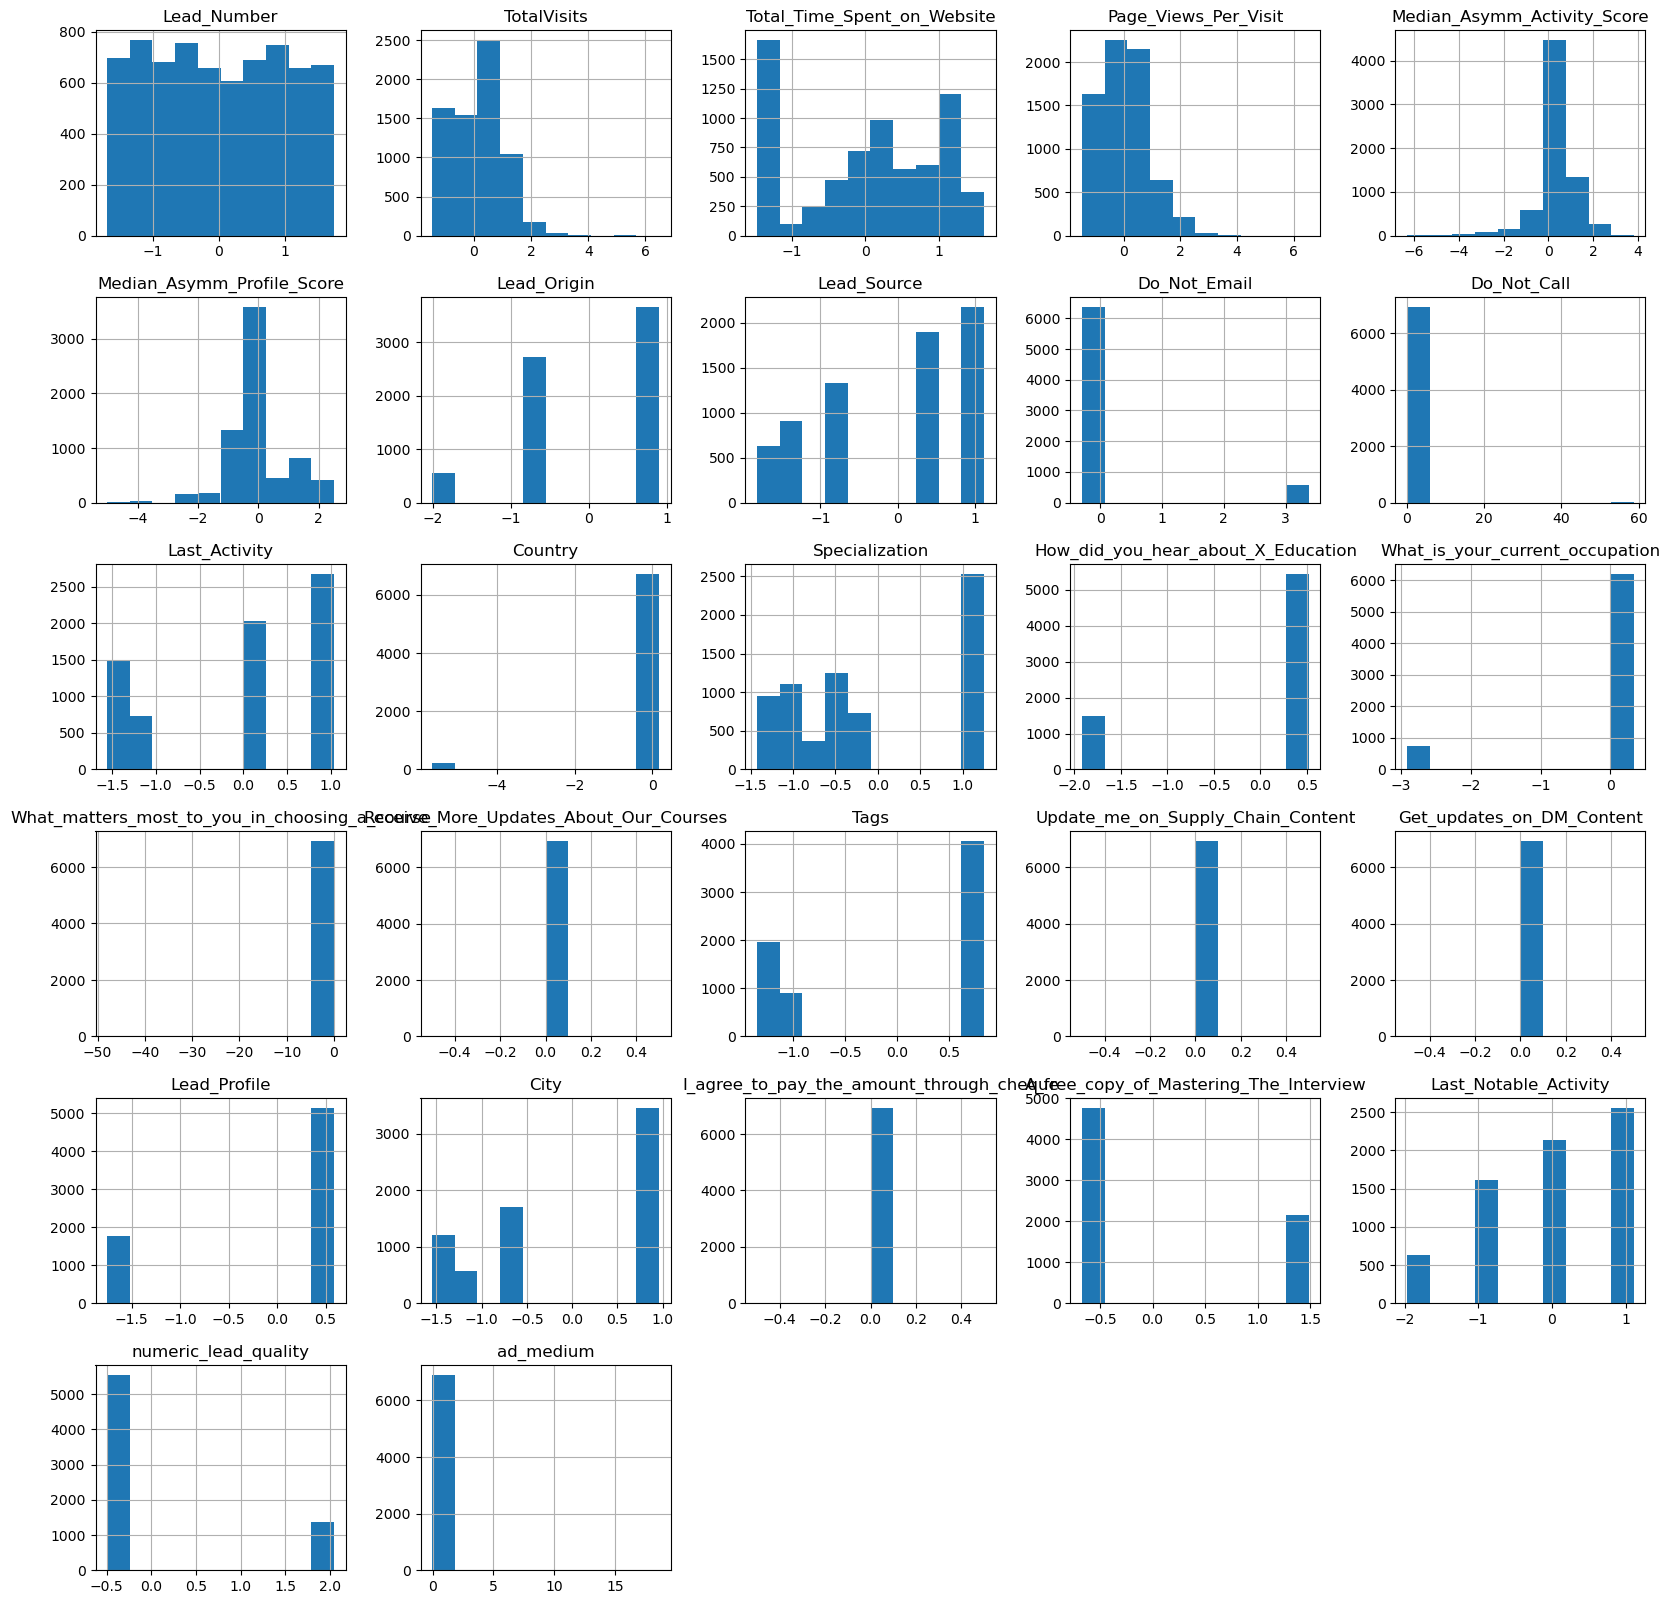

In [102]:
x_train_scaled_df.hist(figsize=(20,20))

### transform test set

In [104]:
x_test_scaled = power_tr.transform(features_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled,columns=power_tr.feature_names_in_)
x_test_scaled_df.head()

,Lead_Number,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Median_Asymm_Activity_Score,Median_Asymm_Profile_Score,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,...,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,numeric_lead_quality,ad_medium
0,-1.253982,0.739292,1.335405,0.301344,-0.175604,0.652826,0.904278,0.386489,-0.295923,-0.016991,...,-1.303794,0.0,0.0,0.58828,-1.399598,0.0,-0.672474,1.116720,-0.49807,-0.053799
1,1.318575,-1.473420,-1.477715,-1.468731,0.796470,0.652826,-1.954667,-1.617973,-0.295923,-0.016991,...,0.837007,0.0,0.0,0.58828,-0.553886,0.0,-0.672474,1.116720,-0.49807,-0.053799
2,1.546569,1.681472,-0.165094,0.784411,-1.126694,-0.076044,0.904278,-1.257703,-0.295923,-0.016991,...,-1.009983,0.0,0.0,0.58828,-1.304343,0.0,1.487046,-0.067331,-0.49807,-0.053799
3,0.091316,-0.153445,-0.714790,0.055704,-0.175604,-0.076044,0.904278,0.386489,-0.295923,-0.016991,...,-1.286808,0.0,0.0,0.58828,-1.304343,0.0,1.487046,-0.067331,-0.49807,-0.053799
4,-1.213772,1.428703,0.222189,2.221099,-3.843421,1.322554,0.904278,1.119014,-0.295923,-0.016991,...,-1.009983,0.0,0.0,0.58828,0.962096,0.0,1.487046,-0.067331,-0.49807,-0.053799


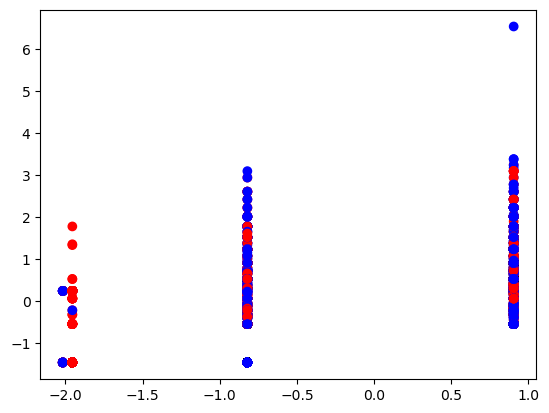

In [126]:
colors = ['red' if y==1 else 'blue' for y in y_train]
colors
plt.scatter(x= x_train_scaled_df['Lead_Origin'],y=x_train_scaled_df['Page_Views_Per_Visit'],c=colors)

### Feature selection 
#### .- variance threshold : remove features with < 0.8% variance 
#### .- recursive feature elimination

In [139]:
svc = SVC(kernel="linear", C=1)
recursive_feature_elimination = RFE(estimator=svc)
recursive_feature_elimination.fit(x_train_scaled_df, y_train)

RFE(estimator=SVC(C=1, kernel='linear'))

In [140]:
recursive_feature_elimination.get_feature_names_out().size

13

In [141]:
selected_features = recursive_feature_elimination.get_feature_names_out()
selected_features

array(['Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Median_Asymm_Activity_Score', 'Median_Asymm_Profile_Score',
       'Lead_Origin', 'Last_Activity', 'Specialization',
       'What_is_your_current_occupation', 'Tags', 'Lead_Profile', 'City',
       'Last_Notable_Activity', 'numeric_lead_quality'], dtype=object)

In [145]:
x_train_final = x_train_scaled_df.loc[:,selected_features]
x_train_final.head()

,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Median_Asymm_Activity_Score,Median_Asymm_Profile_Score,Lead_Origin,Last_Activity,Specialization,What_is_your_current_occupation,Tags,Lead_Profile,City,Last_Notable_Activity,numeric_lead_quality
0,-0.506641,-0.224047,-0.175604,-0.076044,-0.820874,-1.328311,1.254792,0.342873,0.837007,0.588280,0.962096,-1.908752,-0.498070
1,0.294843,0.521120,-0.175604,-0.076044,0.904278,1.037866,-0.987050,0.342873,0.837007,-1.739631,0.962096,-0.067331,-0.498070
2,-1.477715,-1.468731,-0.175604,-0.076044,-0.820874,0.103536,1.254792,0.342873,0.837007,0.588280,-0.553886,-0.926114,-0.498070
3,-0.087331,0.055704,-0.175604,0.652826,0.904278,0.103536,-1.177471,0.342873,-1.327480,0.588280,0.962096,-0.926114,-0.498070
4,1.278694,0.378651,-0.175604,-0.076044,0.904278,-1.178026,-1.313329,0.342873,-1.213164,0.588280,0.962096,1.116720,1.935537


### splitting the training set to training and validation set

In [163]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train_final,y_train,random_state=18)

In [164]:
x_train.shape, x_valid.shape

((5197, 13), (1733, 13))

### Logistic regression model for binary classification

In [165]:
lm = linear_model.LogisticRegression()
lm.fit(x_train,y_train)


LogisticRegression()

In [167]:
x_validation_subset_feat = x_valid.loc[:,selected_features]
y_valid_pred = lm.predict(x_validation_subset_feat)

In [168]:
f1_score(y_valid,y_valid_pred)

0.753370340999207

In [169]:
accuracy_score(y_valid,y_valid_pred)

0.8205424120023082

In [170]:
x_test_final = x_test_scaled_df.loc[:,selected_features]

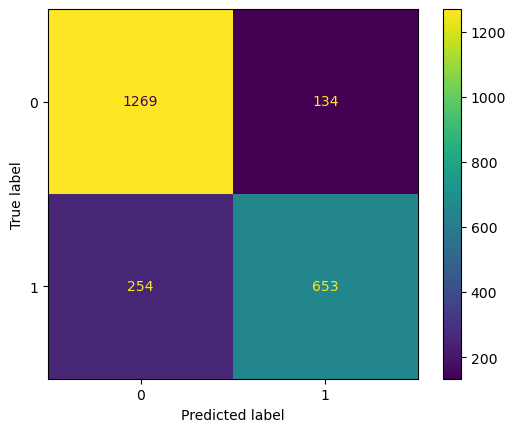

In [171]:
y_pred = lm.predict(x_test_final)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [172]:
accuracy_score(y_test,y_pred)

0.832034632034632

In [173]:
f1_score(y_test,y_pred)

0.7709563164108619

### With test set F1 score almost equal to validation set F1 score, the model might be over-fitting the data

In [189]:
coeff = np.round(lm.coef_,2).flatten().tolist()
#print(coeff)
feat_imp = {}
for i,name in enumerate(selected_features):
    #print(i)
    feat_imp[name] = coeff[i]

for k,v in feat_imp.items():
    print(k,v)

Total_Time_Spent_on_Website 1.17
Page_Views_Per_Visit -0.48
Median_Asymm_Activity_Score 0.4
Median_Asymm_Profile_Score 0.44
Lead_Origin -1.1
Last_Activity 0.44
Specialization -0.65
What_is_your_current_occupation -0.33
Tags 0.98
Lead_Profile -0.38
City -0.36
Last_Notable_Activity -0.58
numeric_lead_quality 0.33


### Conlcusion
.- Total time spent on website is the highest positively contributing factor (direct correlation) to conversion rate <br>
.- Tags are based on status of the lead also an important feature <br>
.- Lead origin is seen to inversly correlate with conversion rate <br>

In [191]:
lm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}